# Setup

In [1]:
# package
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline

In [20]:
# utils
def load_data(path):
    dataset = np.loadtxt(path, delimiter=',')
    X = dataset[:, :2]
    y = dataset[:, 2:]
    return X, y

def plot_data(X, y, pos_label, neg_label):
    pos = (y==1)
    neg = (y==0)
    
    plt.scatter(X[pos, 0], X[pos, 1], c='blue', label=pos_label)
    plt.scatter(X[neg, 0], X[neg, 1], c='green', label=neg_label)
    plt.xlabel('Score exam 1')
    plt.ylabel('Score exam 2')
    plt.legend()
    plt.show()
    
def plot_descision_boundary(X, y,  w, b, pos_label, neg_label):
    pos = (y==1)
    neg = (y==0)
    
    plt.scatter(X[pos, 0], X[pos, 1], c='blue', label=pos_label)
    plt.scatter(X[neg, 0], X[neg, 1], c='green', label=neg_label)
    
    w1, w2 = w
    x1 = np.linspace(20, 101, 100)
    x2 = -b/w2 - x1*w1/w2
    plt.plot(x1, x2)
    
    plt.xlabel('Score exam 1')
    plt.ylabel('Score exam 2')
    plt.legend()
    plt.show()
    
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features 
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

# Logistic Regression

In [3]:
# load dataset
X_train, y_train = load_data('data/scores.txt')
y_train = y_train.squeeze()

In [4]:
# view data
print(f'shape of x_train: {X_train.shape}')
print(f'x_train 1->5: {X_train[0:5]}')
print(f'shape of x_train: {y_train.shape}')
print(f'y_train 1->5: {y_train[0:5]}')

shape of x_train: (100, 2)
x_train 1->5: [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
shape of x_train: (100,)
y_train 1->5: [0. 0. 0. 1. 1.]


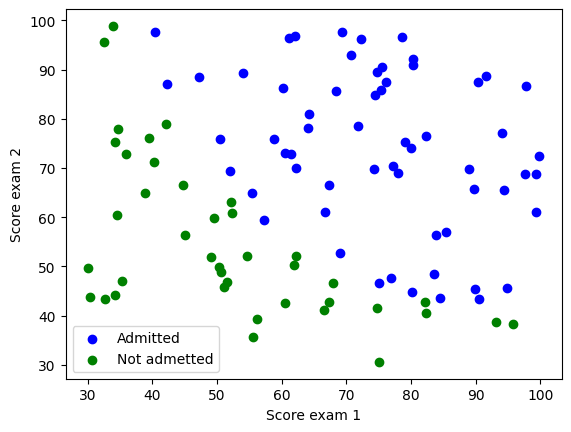

In [5]:
# visualize data
plot_data(X_train, y_train, pos_label='Admitted', neg_label='Not admetted')

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def cost_function(X, y, w, b):
    """
    X: (m, n)
    y: (m, )
    w: (n, )
    b: (scalar)
    """
    n_samples = X.shape[0]
    
    # compute f
    f = sigmoid(np.dot(X, w) + b)
    
    # compute log loss
    log_loss = - np.dot(y, np.log(f)) - np.dot((1-y), np.log(1-f))
    
    log_loss = log_loss/n_samples
    
    return log_loss

In [8]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = cost_function(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [9]:
def gradient_function(X, y, w, b):
    
    n_samples = X.shape[0]
    
    f = sigmoid(np.dot(X, w) + b)
    error = f - y # (m, )
    dw = np.dot(error, X)
    dw = dw/n_samples
    db = np.sum(error)/ n_samples
    
    return dw, db

In [10]:
initial_w = np.zeros(n)
initial_b = 0.

dj_dw, dj_db = gradient_function(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.009216589291151, -11.262842205513593]


In [11]:
def gradient_descent_function(X, y, w, b, learning_rate, iterations):
    
    cost_history = []
    weight_history = []
    for i in range(iterations):
        dw, db = gradient_function(X, y, w, b)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        cost_i = cost_function(X, y, w, b)
        cost_history.append(cost_i)
        
        if (i % 1000) == 0:
            weight_history.append(w)
            print(f'Iteration {i} --->  cost: {cost_i} --> w: {w}, b: {b} ')
    
    return w, b, cost_history, weight_history

In [12]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent_function(X_train ,y_train, initial_w, initial_b, alpha, iterations)

Iteration 0 --->  cost: 1.007100807758499 --> w: [0.04480934 0.04435163], b: -7.99940033535013 
Iteration 1000 --->  cost: 0.30509049149192413 --> w: [0.0699251  0.06348073], b: -8.018345414377166 
Iteration 2000 --->  cost: 0.3047229729345013 --> w: [0.07007458 0.06363247], b: -8.037515011694051 
Iteration 3000 --->  cost: 0.3043578718566941 --> w: [0.07022359 0.06378372], b: -8.056621457471966 
Iteration 4000 --->  cost: 0.3039951642284134 --> w: [0.07037213 0.06393448], b: -8.075665173142022 
Iteration 5000 --->  cost: 0.3036348263373082 --> w: [0.07052019 0.06408475], b: -8.094646575944829 
Iteration 6000 --->  cost: 0.3032768347835775 --> w: [0.0706678  0.06423454], b: -8.11356607898463 
Iteration 7000 --->  cost: 0.3029211664748841 --> w: [0.07081494 0.06438386], b: -8.132424091282429 
Iteration 8000 --->  cost: 0.30256779862136196 --> w: [0.07096163 0.0645327 ], b: -8.151221017828528 
Iteration 9000 --->  cost: 0.3022167087307233 --> w: [0.07110786 0.06468106], b: -8.16995725963

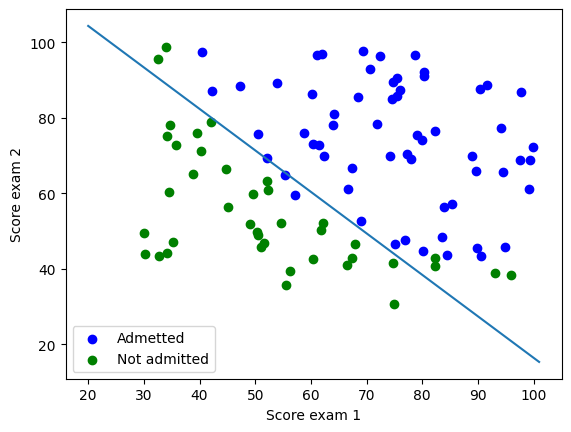

In [13]:
plot_descision_boundary(X_train, y_train, w, b, pos_label='Admetted', neg_label='Not admitted')

In [14]:
def predict(X, y, w, b):
    
    n_samples = X.shape[0]
    
    f = sigmoid(np.dot(X, w) + b)
    
    for i in range(n_samples):
        f[i] = 1 if f[i] >= 0.5 else 0
    
    return f

In [15]:
prediction = predict(X_train, y_train, w, b)

In [16]:
n_samples = X_train.shape[0]
accuracy = np.sum(prediction==y_train)/n_samples
print(f'Accuracy: {accuracy}')

Accuracy: 0.92


# Logistic Regression with Regularization

In [17]:
# load dataset
X_train, y_train = load_data('data/microchip_test.txt')
y_train = y_train.squeeze()

In [18]:
print(f'x train 0 -> 5: {X_train[0:5]}')
print(f'y train 0 -> 5: {y_train[0:5]}')

x train 0 -> 5: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
y train 0 -> 5: [1. 1. 1. 1. 1.]


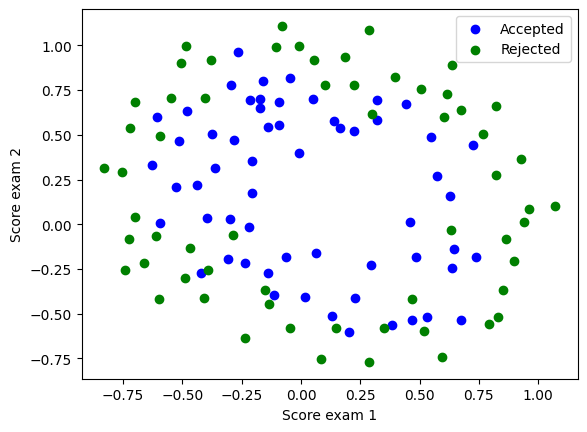

In [19]:
plot_data(X_train, y_train, pos_label='Accepted', neg_label='Rejected')

In [21]:
mapped_X = map_feature(X_train[:, 0], X_train[:, 1])

In [22]:
print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of mapped x: {mapped_X.shape}')

Shape of x_train: (118, 2)
Shape of mapped x: (118, 27)


In [53]:
def reg_cost_function(x, y, w, b, lambda_):
    
    n_samples = x.shape[0]
    
    cost_without_reg = cost_function(x, y, w, b)
    
    reg_term = (lambda_/(2*n_samples)) * np.sum(np.square(w))
    
    cost_reg = cost_without_reg + reg_term
    
    return cost_reg

In [54]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = reg_cost_function(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)


Regularized cost : 0.6618252552483949


In [55]:
def reg_gradient_function(x, y, w, b, lambda_):
    
    n_samples = x.shape[0]
    
    dw, db = gradient_function(x, y, w, b)
    
    dw = dw + (lambda_/n_samples)*w
    
    return dw, db

In [56]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_dw, dj_db = reg_gradient_function(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )


dj_db: 0.07138288792343654
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280116, 0.0536273463274574, 0.003140278267313463]


In [64]:
def gradient_descent_with_regularization(x, y, w, b, learning_rate=0.01, lambda_=0.5, iters=10000):
    
    for i in range(iters):
        dw, db = reg_gradient_function(x, y, w, b, lambda_)
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 1000 == 0:
            print(f'Iteration {i} --->  cost: {reg_cost_function(x, y, w, b, lambda_)}')
    return w, b

In [65]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b= gradient_descent_with_regularization(X_mapped, y_train, initial_w, initial_b, learning_rate=alpha, lambda_=0.01, iters=iterations)

Iteration 0 --->  cost: 0.7210188345400225
Iteration 1000 --->  cost: 0.5874629876860553
Iteration 2000 --->  cost: 0.5571493267445515
Iteration 3000 --->  cost: 0.5331852187780523
Iteration 4000 --->  cost: 0.5136692113794709
Iteration 5000 --->  cost: 0.49746116535166146
Iteration 6000 --->  cost: 0.4837818783748563
Iteration 7000 --->  cost: 0.4720805864439526
Iteration 8000 --->  cost: 0.46195696269215014
Iteration 9000 --->  cost: 0.45311293975968187


In [79]:
def plot_decision_boundary_reg(x, y, w, b):
    
    pos = (y==1)
    neg = (y==0)
    
    plt.scatter(x[pos, 0], x[pos, 1], c='blue', label='Accepted')
    plt.scatter(x[neg, 0], x[neg, 1], c='green', label='Rejected')
    plt.xlabel('Score exam 1')
    plt.ylabel('Score exam 2')
    plt.legend()
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
                
    z = z.T
    
    plt.contour(u,v,z, levels = [0.5], colors="g")
    
    plt.show()

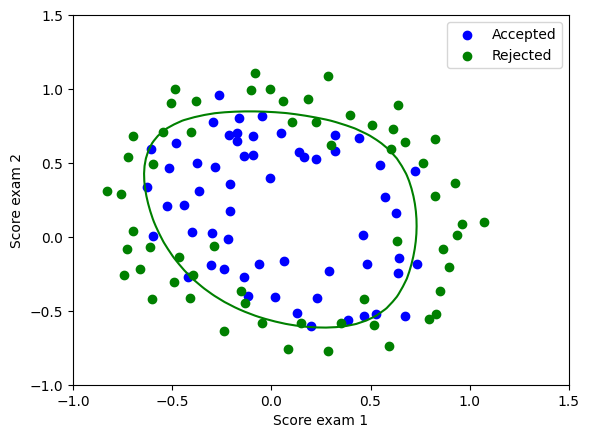

In [80]:
# plot decision boundary
plot_decision_boundary_reg(X_train, y_train, w, b)

In [101]:
def predict_microchip(w, b, x):
    
    n_samples = x.shape[0]
    
    mapped_x = map_feature(x[:, 0], x[:, 1])
    
    predictions = sigmoid(np.dot(mapped_x, w) + b)
    
    for sample in range(n_samples):
        predictions[sample] = 1 if predictions[sample] >= 0.5 else 0
    
    return predictions

In [103]:
predictions = predict_microchip(w, b, X_train)

In [105]:
n_samples = X_train.shape[0]
accuracy = np.sum(predictions == y_train)/n_samples
print(f'Accuracy: {accuracy}')

Accuracy: 0.8220338983050848
